In [3]:
import pandas as pd
import sqlite3  # for SQLite databases
# import pymysql  # for MySQL
# import psycopg2  # for PostgreSQL
# import pyodbc   # for SQL Server

# Connect to your database
conn = sqlite3.connect('social_network_anonymized.db')


In [16]:

sql_users = """
SELECT id, name, profile_type as type FROM Profiles
where profile_type = 'group'
"""

dfuser = pd.read_sql_query(sql_users, conn)


In [ ]:
sql_activity = """
select a.id, a.type, a.timestamp, p.relationship_type
FROM Activity a
LEFT JOIN ProfileActivity p 
ON p.id = p.activity_id
"""

dfactivity = pd.read_sql_query(sql_activity, conn)

In [ ]:
dfactivity.head(10)

In [7]:
import pandas as pd
import sqlite3  # for SQLite databases
# import pymysql  # for MySQL
# import psycopg2  # for PostgreSQL
# import pyodbc   # for SQL Server

# Connect to your database
conn = sqlite3.connect('social_network_anonymized.db')


sql_links = """
SELECT id, source_id, target_id FROM ProfileConnection
WHERE connection_type = 'ADDED_THEM_AS_A_FRIEND_ON_FACEBOOK'
"""

dflink = pd.read_sql_query(sql_links, conn)

dflink.shape

(11530, 3)

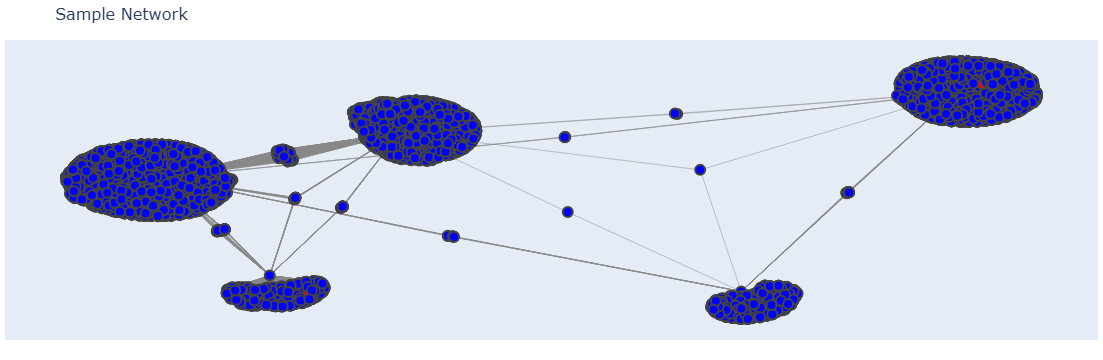

In [9]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

def visualize_network(df, source_col, target_col, title="Network Visualization"):
    """
    Visualize a network from a two-column pandas DataFrame using NetworkX and Plotly.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the network data
    source_col : str
        Name of the column containing source nodes
    target_col : str
        Name of the column containing target nodes
    title : str
        Title for the visualization
        
    Returns:
    --------
    plotly.graph_objects.Figure
    """
    # Create a graph from the DataFrame
    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col)
    
    # Get node positions using a layout algorithm
    pos = nx.spring_layout(G, seed=42)
    
    # Extract node positions
    node_x = []
    node_y = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
    
    # Create edge traces
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    
    # Define nodes that should be red
    red_nodes = [7381, 19553, 20434, 20481, 20482, 20483, 20484, 20485, 20486, 20487, 20488, 20489, 20490, 20491, 20492, 20493, 20494, 20848, 20874, 20875, 20876, 20877, 20878, 20879, 20880, 20881, 21263, 21462, 23206, 23232, 23233, 23234, 23362, 23381, 23387, 23412, 23442, 23443, 23444, 23445, 23446, 23447, 23539, 23541, 24435, 24436, 24437, 24438, 24439, 24440, 24441, 24442, 24443, 24444, 24968, 25335, 25342, 25346, 25375]
    
    # Create node trace
    node_colors = []
    node_text = []
    
    for node in G.nodes():
        adjacencies = len(list(G.neighbors(node)))
        node_text.append(f'{node}<br># of connections: {adjacencies}')
        node_colors.append('red' if node in red_nodes else 'blue')
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            color=node_colors,  # Apply custom node colors
            line_width=2
        ),
        text=node_text
    )
    
    # Create the figure
    fig = go.Figure(data=[edge_trace, node_trace],
                   layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    
    return fig

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'source': dflink['source_id'],
        'target': dflink['target_id']
    }
    df = pd.DataFrame(data)
    
    # Visualize the network
    fig = visualize_network(df, 'source', 'target', "Sample Network")
    
    # Show the figure
    fig.show()
    